## Importing Dependencies

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [3]:
loan_data = pd.read_csv('C:/Users/KIIT0001/Desktop/ML/.ML/loan_dataset.csv')

In [4]:
type(loan_data)

pandas.core.frame.DataFrame

In [5]:
print(loan_data.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [6]:
print(loan_data.tail())

      Loan_ID  Gender Married Dependents Education Self_Employed  \
609  LP002978  Female      No          0  Graduate            No   
610  LP002979    Male     Yes         3+  Graduate            No   
611  LP002983    Male     Yes          1  Graduate            No   
612  LP002984    Male     Yes          2  Graduate            No   
613  LP002990  Female      No          0  Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611     

In [8]:
loan_data.shape

(614, 13)

In [9]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
## Removing Missing values
loan_data =loan_data.dropna()

In [14]:
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
loan_data['Loan_Status'].replace({'N': 0, 'Y': 1}, inplace=True)

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_16568\1721799011.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data['Loan_Status'].replace({'N': 0, 'Y': 1}, inplace=True)
C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_16568\1721799011.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loa

In [20]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [21]:
loan_data['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [22]:
loan_data = loan_data.replace(to_replace='3+', value = 4)

In [23]:
loan_data['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

## Data Visualization

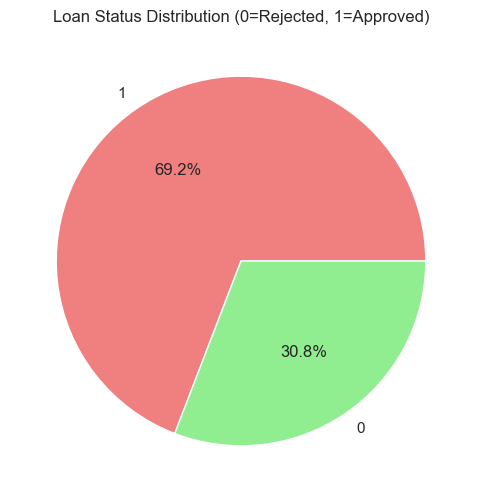

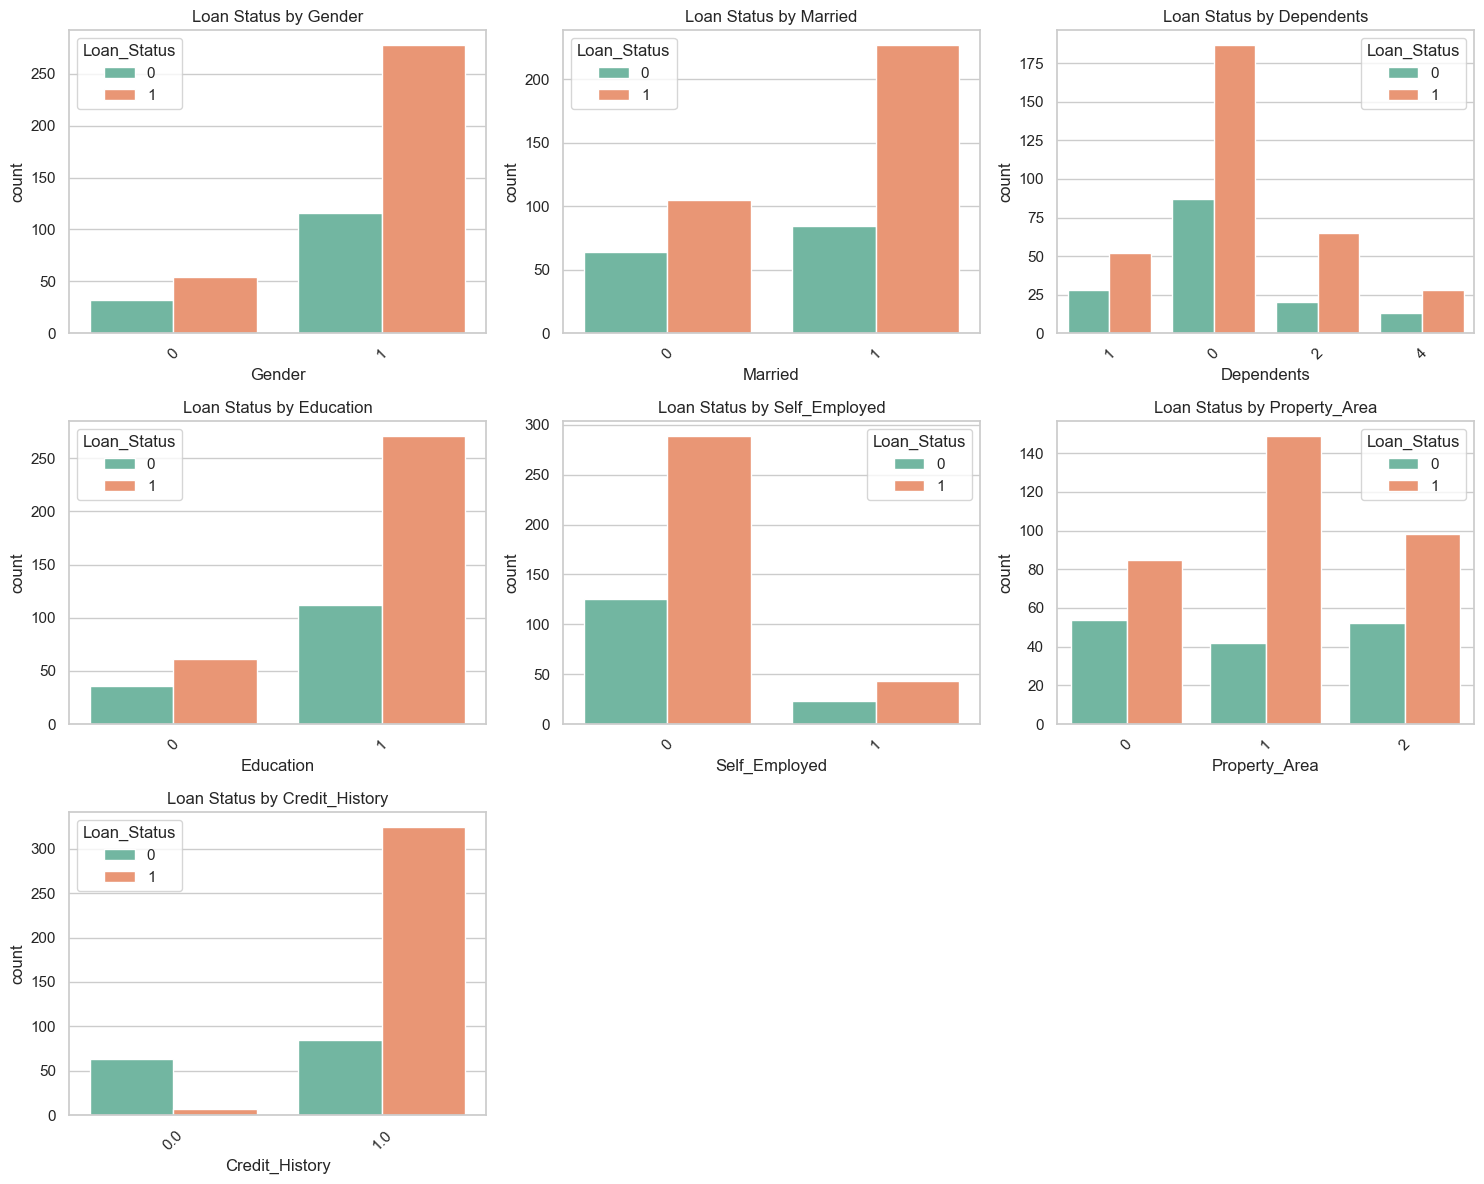

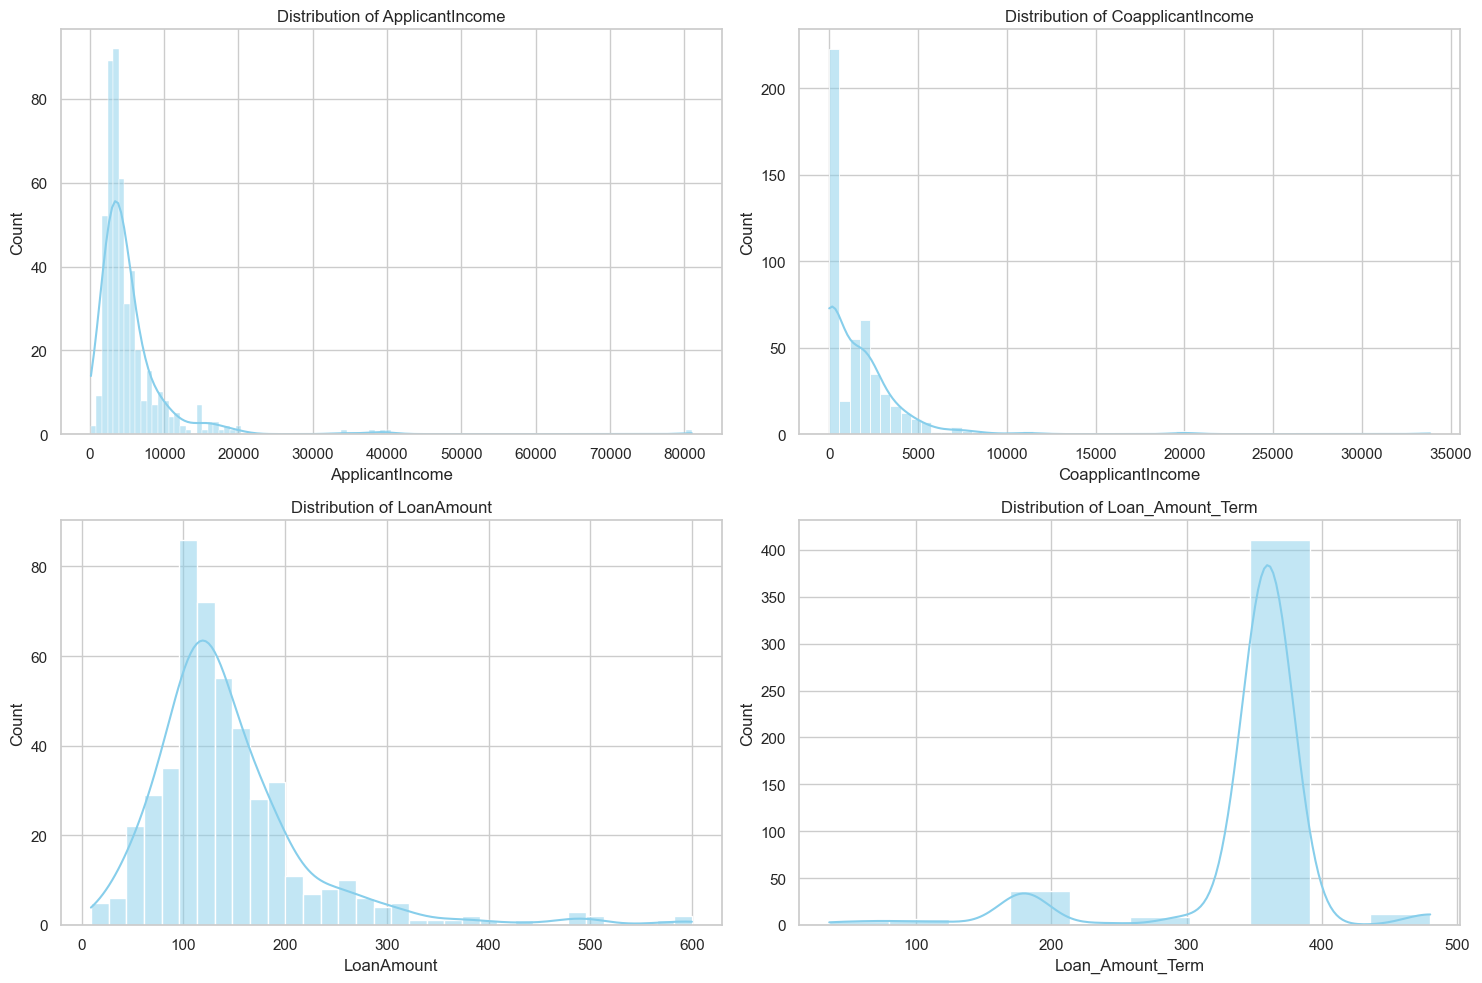

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_16568\3739420869.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_data, x='Loan_Status', y=col, palette='pastel')
C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_16568\3739420869.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_data, x='Loan_Status', y=col, palette='pastel')
C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_16568\3739420869.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_data, x='Loan_Status', y=col, palette='pastel')
C:\Users\KIIT0001\AppD

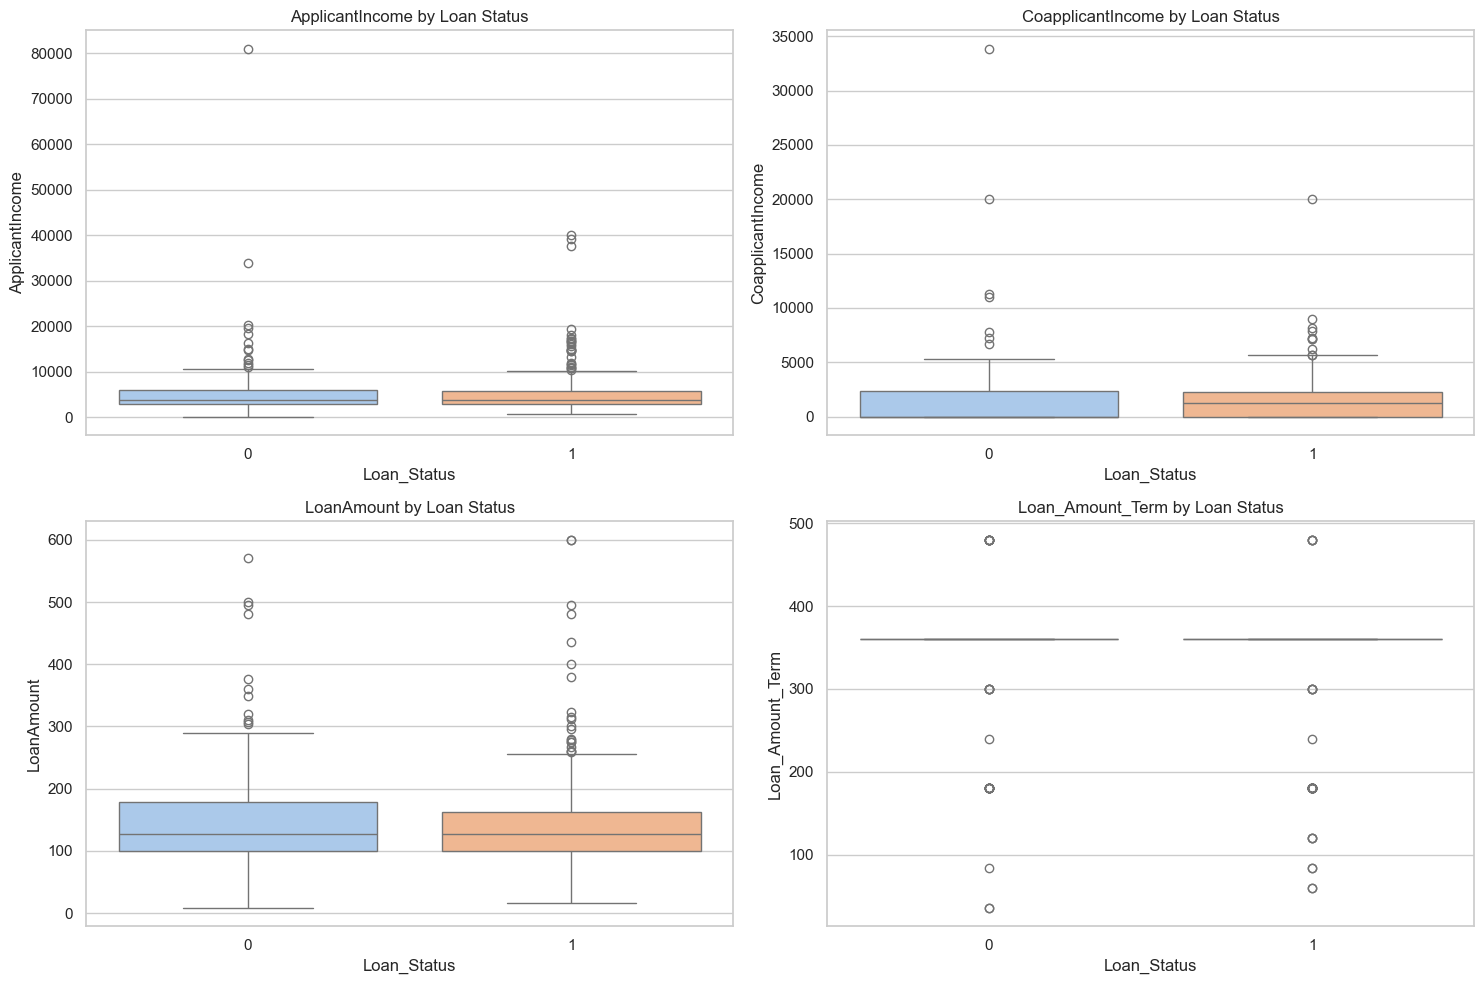

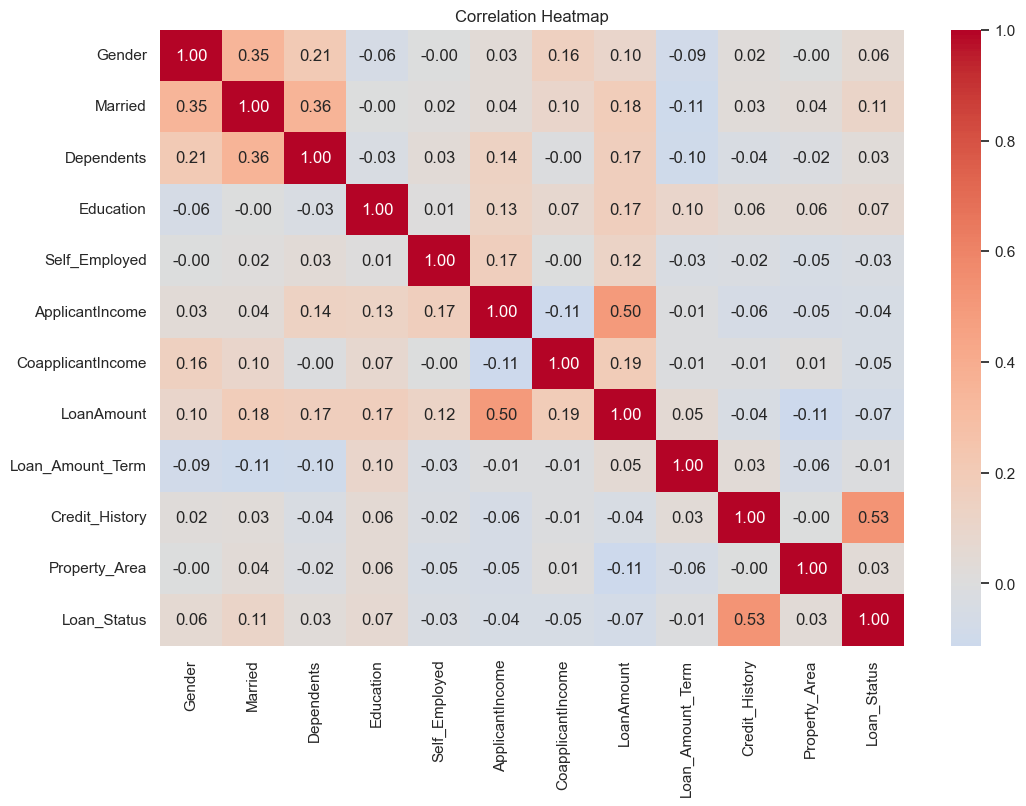

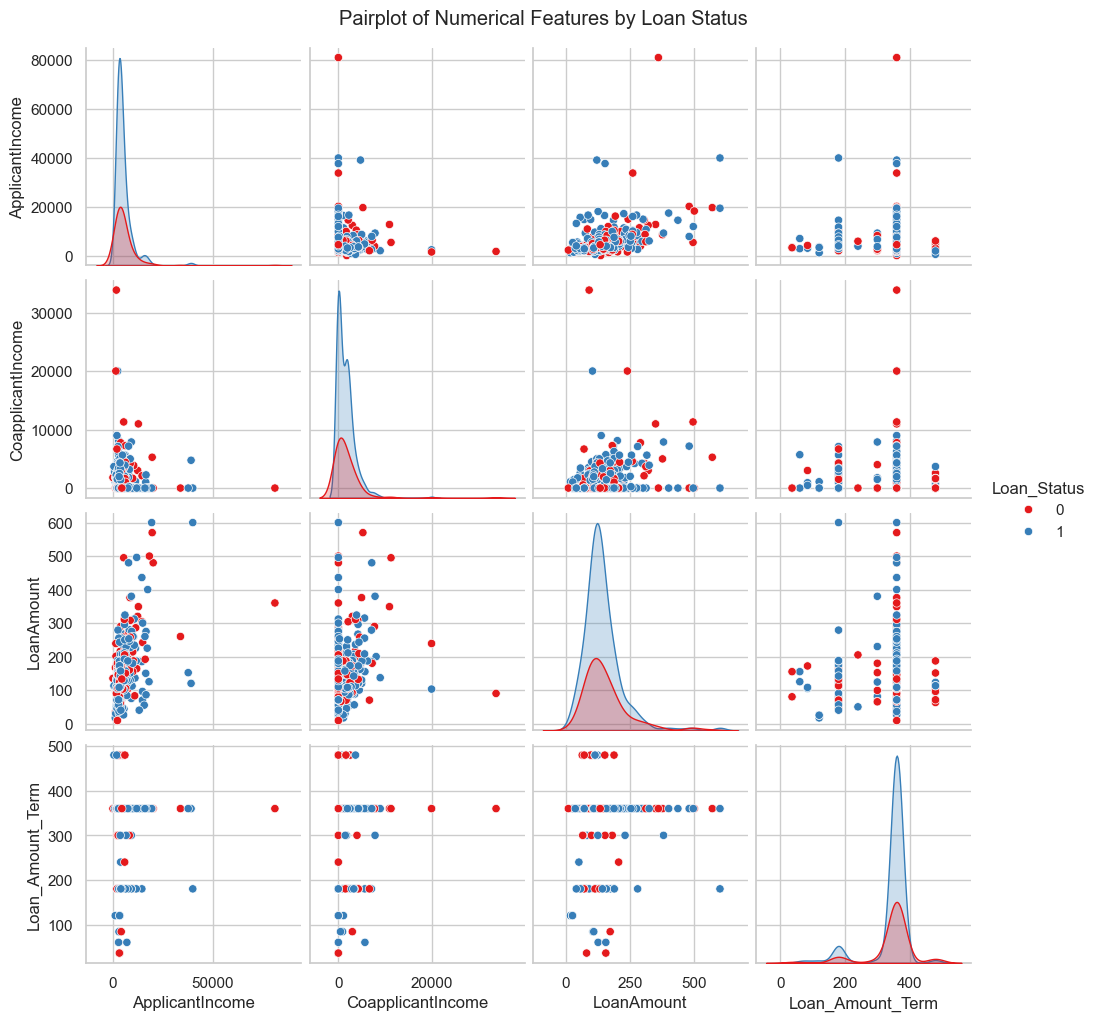

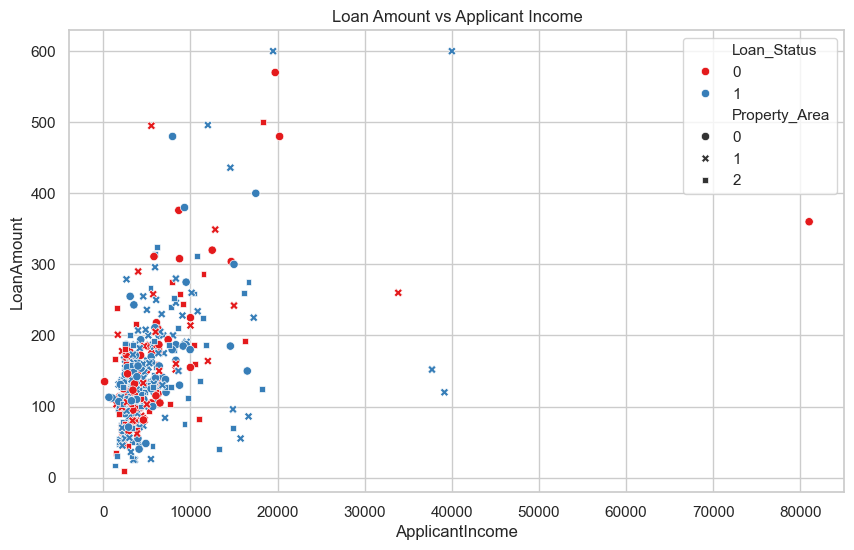

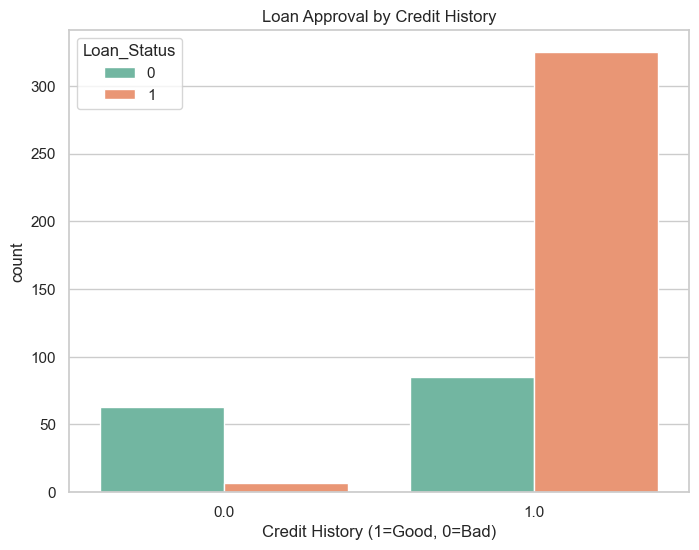

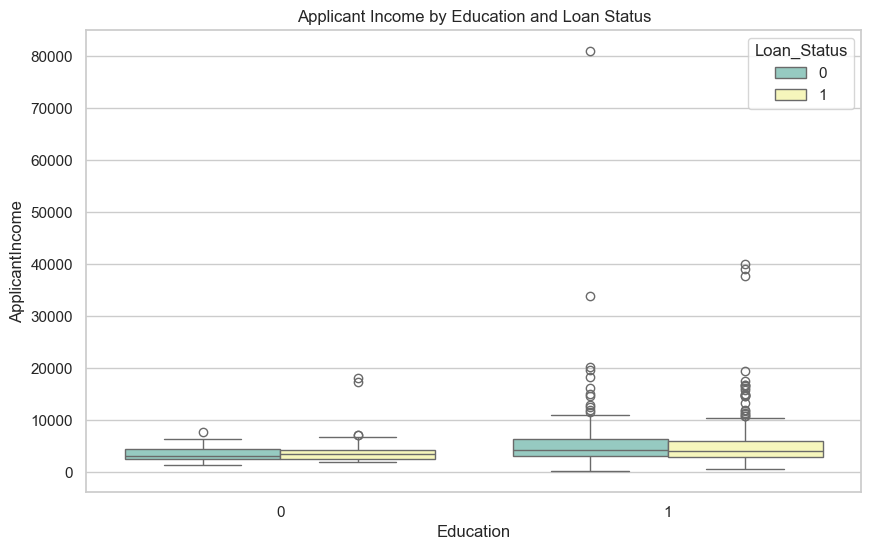

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style="whitegrid")

## 1. Loan Status Distribution
plt.figure(figsize=(6, 6))
loan_data['Loan_Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', 
                                            colors=['lightcoral', 'lightgreen'])
plt.title('Loan Status Distribution (0=Rejected, 1=Approved)')
plt.ylabel('')
plt.show()

## 2. Categorical Features vs Loan Status
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']

plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=loan_data, x=col, hue='Loan_Status', palette='Set2')
    plt.title(f'Loan Status by {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3. Numerical Features Distribution
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i+1)
    sns.histplot(loan_data[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

## 4. Boxplots for Numerical Features by Loan Status
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=loan_data, x='Loan_Status', y=col, palette='pastel')
    plt.title(f'{col} by Loan Status')
plt.tight_layout()
plt.show()

## 5. Correlation Heatmap
# Convert categorical variables to numerical for correlation
loan_data_numeric = loan_data.drop(['Loan_ID'], axis=1).copy()

# Convert remaining categorical variables
for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']:
    loan_data_numeric[col] = loan_data_numeric[col].astype('category').cat.codes

plt.figure(figsize=(12, 8))
corr = loan_data_numeric.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
## 6. Pairplot for Numerical Features
sns.pairplot(loan_data[numerical_cols + ['Loan_Status']], hue='Loan_Status', palette='Set1')
plt.suptitle('Pairplot of Numerical Features by Loan Status', y=1.02)
plt.show()

## 7. Loan Amount vs Income
plt.figure(figsize=(10, 6))
sns.scatterplot(data=loan_data, x='ApplicantIncome', y='LoanAmount', 
                hue='Loan_Status', style='Property_Area', palette='Set1')
plt.title('Loan Amount vs Applicant Income')
plt.show()

## 8. Credit History Impact
plt.figure(figsize=(8, 6))
sns.countplot(data=loan_data, x='Credit_History', hue='Loan_Status', palette='Set2')
plt.title('Loan Approval by Credit History')
plt.xlabel('Credit History (1=Good, 0=Bad)')
plt.show()

## 9. Education vs Loan Status with Income
plt.figure(figsize=(10, 6))
sns.boxplot(data=loan_data, x='Education', y='ApplicantIncome', hue='Loan_Status', palette='Set3')
plt.title('Applicant Income by Education and Loan Status')
plt.show()

<Axes: xlabel='Education', ylabel='count'>

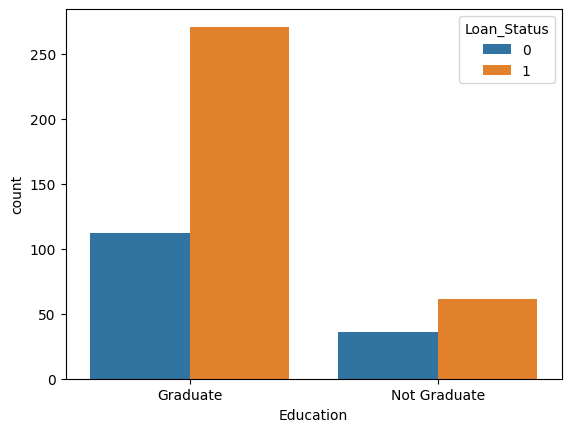

In [25]:
sns.countplot(x = 'Education',hue='Loan_Status',data=loan_data)

<Axes: xlabel='Married', ylabel='count'>

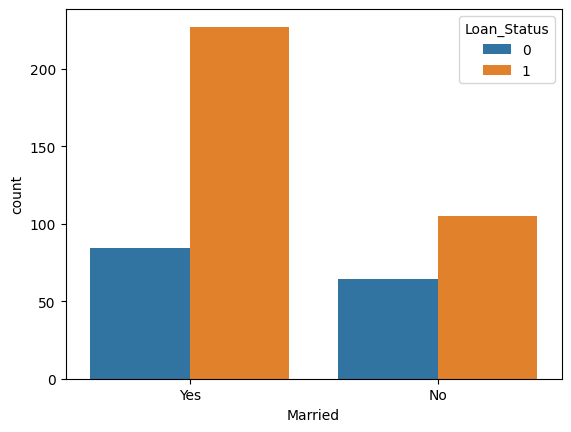

In [26]:
sns.countplot(x='Married',hue='Loan_Status',data=loan_data)

In [29]:
# Convert catagorical columns to numerical values
loan_data.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                   'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Not Graduate':0,
                   'Graduate':1}},inplace=True)

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_16568\2220519088.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_data.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},


In [30]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [32]:
X = loan_data.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_data['Loan_Status']

In [33]:
print(X)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [34]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=2,stratify=Y)

In [35]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


## Training The Model

In [36]:
classifier = svm.SVC(kernel='linear')

In [37]:
## Training the Model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

## Model Evalution

In [38]:
X_train_prediction = classifier.predict(X_train)
training_Data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [39]:
print(training_Data_accuracy)

0.7986111111111112


In [40]:
X_test_prediction = classifier.predict(X_test)
test_Data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [41]:
print(test_Data_accuracy)

0.8333333333333334
